In [17]:
import numpy as np
from diff2vec.feature_extractor import get_feature_vectors
from data_utils.loader import get_twitch_graph, get_lastfm_graph
from diff2vec.numba.feature_extractor import get_feature_vectors_numba, get_graph_sequences_numba
from test_utils.samples import get_random_graph_matrix
import networkx as nx
import time

This noetebook containsts time performance tests for different feature extraction process (enitre process) implementations.

In [18]:
def feature_extraction_unit_test(A):
    print(f"N: {A.shape[1]}")
    G = nx.from_numpy_array(A)
    print("Generation finished")
    
    start = time.time()
    base = get_feature_vectors(G, 3, 10)
    end = time.time()
    print(f"Time base: {end-start}")

    start = time.time()
    numba =  get_feature_vectors_numba(A, 3, 2)
    end = time.time()
    print(f"Time numba: {end-start}")

    #assert (base == numba).all()

## Artificial graphs

In [20]:
feature_extraction_unit_test(get_random_graph_matrix(50))

N: 50
Generation finished


100%|██████████| 50/50 [00:00<00:00, 113.05it/s]

Time base: 0.523184061050415
Time numba: 0.010267496109008789


In [6]:
feature_extraction_unit_test(get_random_graph_matrix(500))

N: 500
Generation finished


100%|██████████| 500/500 [00:26<00:00, 18.94it/s]

Time base: 27.075281858444214
Time numba: 1.006007194519043


## Real graphs

In [29]:
G, targets = get_twitch_graph()

In [30]:
A = nx.to_numpy_array(G).astype("int")

In [31]:
feature_extraction_unit_test(A)

N: 7126
Generation finished


100%|██████████| 7126/7126 [1:20:33<00:00,  1.47it/s]


Time base: 4843.370322465897
Time numba: 215.93585538864136


## Qualitative analysis

### Simple graph

In [15]:
np.random.seed(69)
A = get_random_graph_matrix(5)

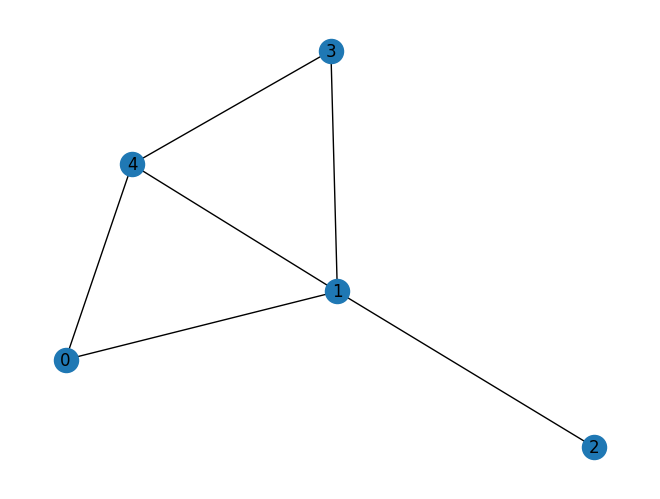

In [16]:
nx.draw(nx.Graph(A), with_labels=True)

In [21]:
get_feature_vectors_numba(A, 1, 2)

array([[0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [22]:
get_graph_sequences_numba(A, 2)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 1],
       [4, 0]])

### Twitch graph

In [13]:
G, targets = get_twitch_graph()
A = nx.to_numpy_array(G).astype("int")

In [14]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
fetures = get_feature_vectors_numba(A, 3, 7)

In [16]:
np.unique(fetures)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  31,  32,  34,  35,  37,  39,  41,  44,  45,
        47,  49,  50,  51,  52,  54,  57,  65,  72,  77,  78,  80,  83,
       107, 147, 203, 235])

In [8]:
fetures = get_feature_vectors_numba(A, 10, 20)

In [9]:
np.unique(fetures)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,
        79,  80,  82,  83,  84,  86,  87,  88,  91,  92,  94,  95,  96,
        98,  99, 100, 101, 103, 105, 106, 109, 111, 112, 114, 119, 120,
       124, 125, 126, 128, 134, 135, 139, 141, 142, 143, 147, 149, 156,
       157, 158, 165, 167, 182, 197, 214, 215, 219, 222, 226, 229, 250,
       257, 264, 308, 313, 358, 372, 523, 617])

## LastFm graph

In [7]:
G, targets = get_lastfm_graph()
A = nx.to_numpy_array(G).astype("int")

In [8]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
fetures = get_feature_vectors_numba(A, 3, 7)

In [10]:
np.unique(fetures)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 37, 42,
       51, 55, 58, 79, 83])

In [11]:
fetures = get_feature_vectors_numba(A, 10, 20)

In [12]:
np.unique(fetures)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  73,  76,  77,  78,  79,  80,
        81,  82,  84,  85,  90,  93,  94,  97,  98,  99, 100, 103, 105,
       108, 131, 135, 136, 144, 151, 160, 163, 168])